In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Leer archivo Excel
df = pd.read_excel('base_20210101a20240430 (2).xlsx', sheet_name='Cliientes_Nuevos')

In [26]:
# Seleccionar las características y la variable objetivo
X = df.drop('es_malo_actual', axis=1)
y = df['es_malo_actual']

In [27]:
# Rellena valores nulos en columnas numéricas con la mediana
numeric_columns = X.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    median_value = X[col].median()  
    X[col] = X[col].fillna(median_value)  

In [28]:
# Eliminar columnas tipo datetime
X = X.select_dtypes(exclude=['datetime64'])

In [29]:
# Convertir características categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

In [30]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
# Entrenar el modelo de regresión logística como baseline
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Calcular la precisión del modelo (Baseline)
accuracy = model.score(X_test, y_test)
print("Precisión del modelo (Baseline):", accuracy)

Precisión del modelo (Baseline): 0.9431818181818182


In [34]:
# Crear Matriz de confusión
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[5617   21]
 [ 379 1023]]


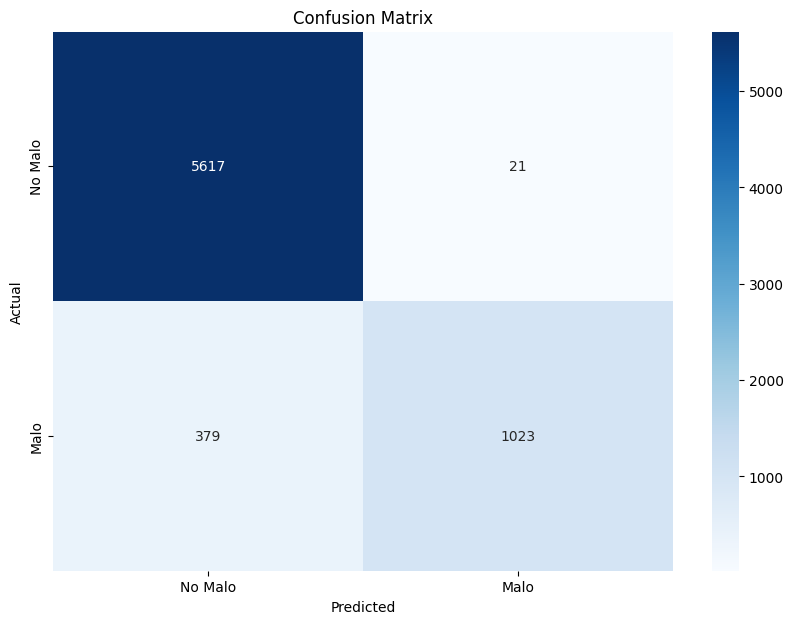

In [35]:
# Grafica de Matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Malo', 'Malo'], yticklabels=['No Malo', 'Malo'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Informe de clasificación
class_report = classification_report(y_test, model.predict(X_test))
print("Informe de Clasificación:")
print(class_report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5638
           1       0.98      0.73      0.84      1402

    accuracy                           0.94      7040
   macro avg       0.96      0.86      0.90      7040
weighted avg       0.95      0.94      0.94      7040



In [37]:
# Identificar características importantes utilizando coeficientes de regresión logística
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print('Importancia de las características:')
pd.set_option('display.max_rows', None) 
print(feature_importance)

Importancia de las características:
                                           Feature  Coefficient
0                                    prospectus_id    -0.476642
1                                             Edad    -0.108770
2                             NumCaracteresSobreMi    -0.046797
3                                        cci_score    -0.114497
4                                         bc_score    -0.263532
5                                      NumCredHist    -1.181480
6                                    MontoCredHist    -0.014381
7                                    CredMobMayor2    -0.028620
8                                   NumCredActivos     0.230617
9                                 MontoCredActivos    -0.227775
10                                        NumCredR    -0.110133
11                                      MontoCredR     0.027500
12                                        NumCredI     1.070785
13                                      MontoCredI     0.033657
14  

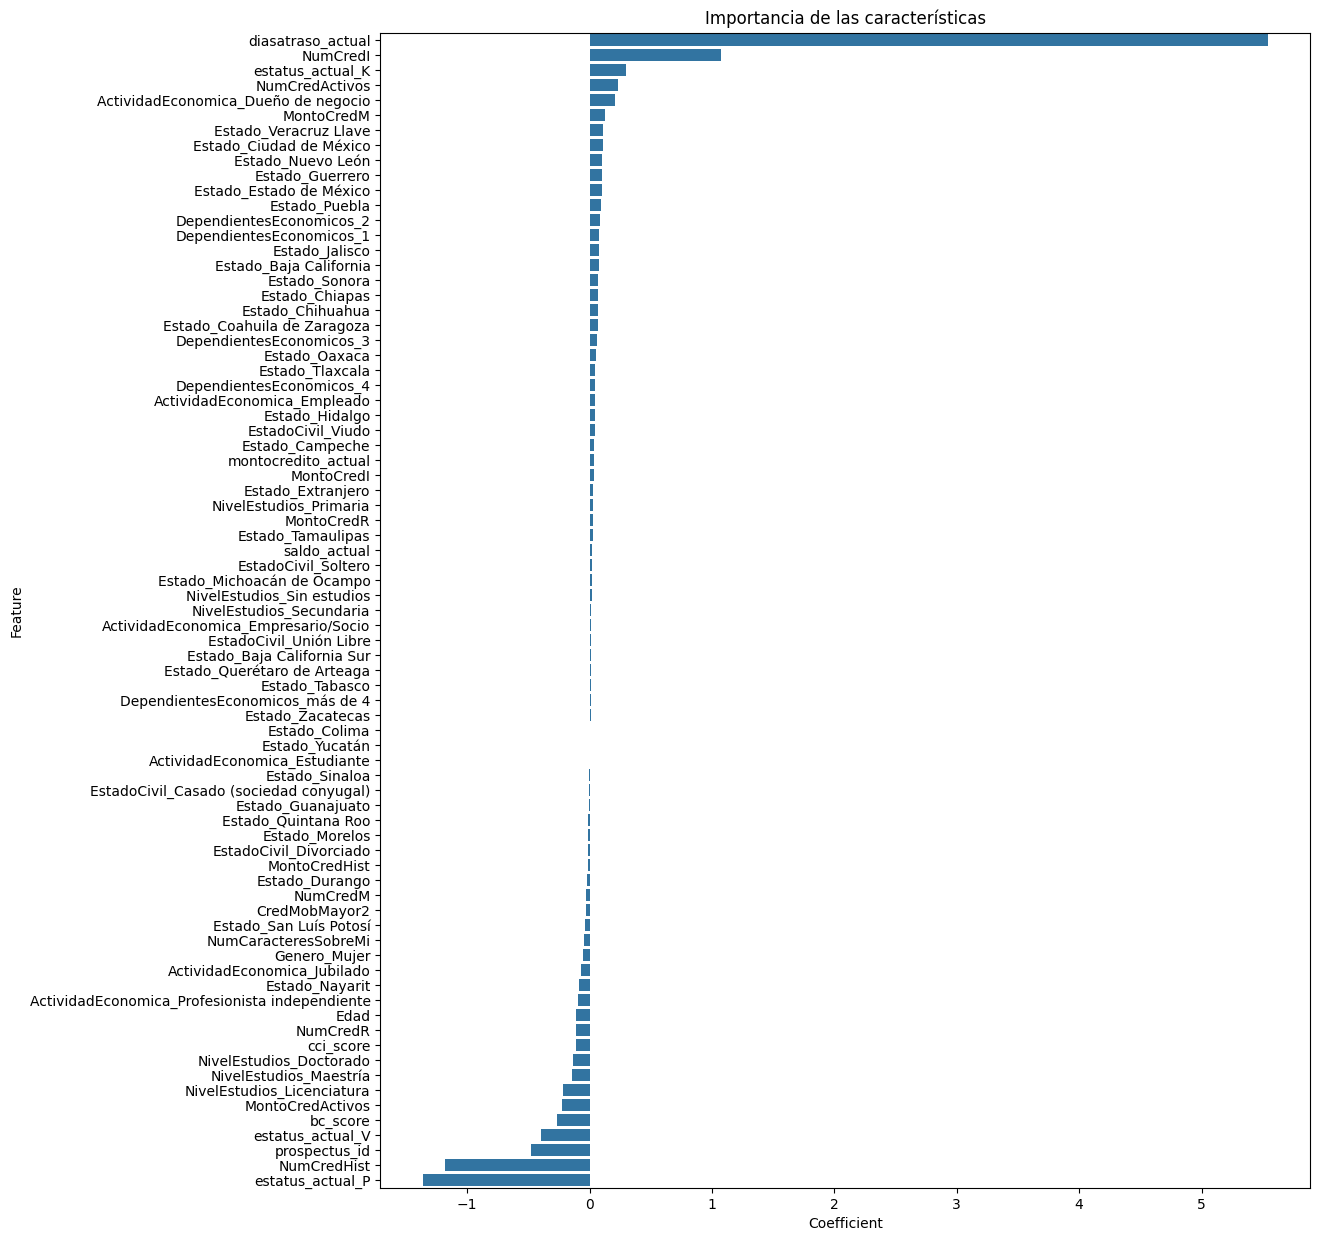

In [38]:
# Grafica de la importancia de las características
plt.figure(figsize=(12, 15))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.sort_values(by='Coefficient', ascending=False))
plt.title('Importancia de las características')
plt.show()

In [39]:
# Evaluar sobreajuste del modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Precisión del conjunto de entrenamiento:", train_score)
print("Precisión del conjunto de prueba:", test_score)

Precisión del conjunto de entrenamiento: 0.9431047341691231
Precisión del conjunto de prueba: 0.9431818181818182


In [40]:
# Calcular la curva ROC junto con el AUC-ROC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

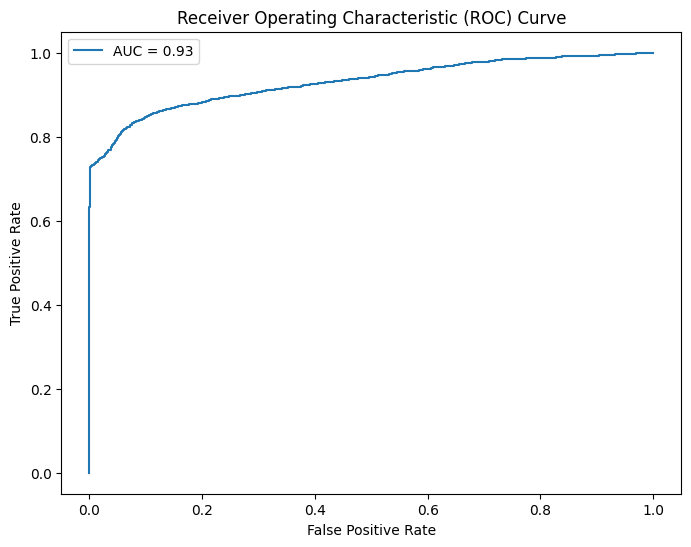

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()